In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [2]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trail_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(mouse_drug_df, clinical_trail_df, how='outer',on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped = combined_df.groupby(["Drug","Timepoint"])
mean = grouped.mean()
# Convert to DataFrame
tumor_mean_df = pd.DataFrame(mean, columns=["Tumor Volume (mm3)"])
# Preview DataFrame
tumor_mean_df


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se = grouped.sem()
# Convert to DataFrame
tumor_se_df = pd.DataFrame(se,columns=["Tumor Volume (mm3)"])
# Preview DataFrame
tumor_se_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [5]:
tumor_df = tumor_mean_df.reset_index()
tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [6]:
# Minor Data Munging to Re-Format the Data Frames
tumor_reformatted_df = tumor_df.pivot(index ='Timepoint', columns ='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_reformatted_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:
tumor_reformatted_df.reset_index(inplace=True)

In [8]:
tumor_reformatted_df.columns

Index(['Timepoint', 'Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril',
       'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

<IPython.core.display.Javascript object>


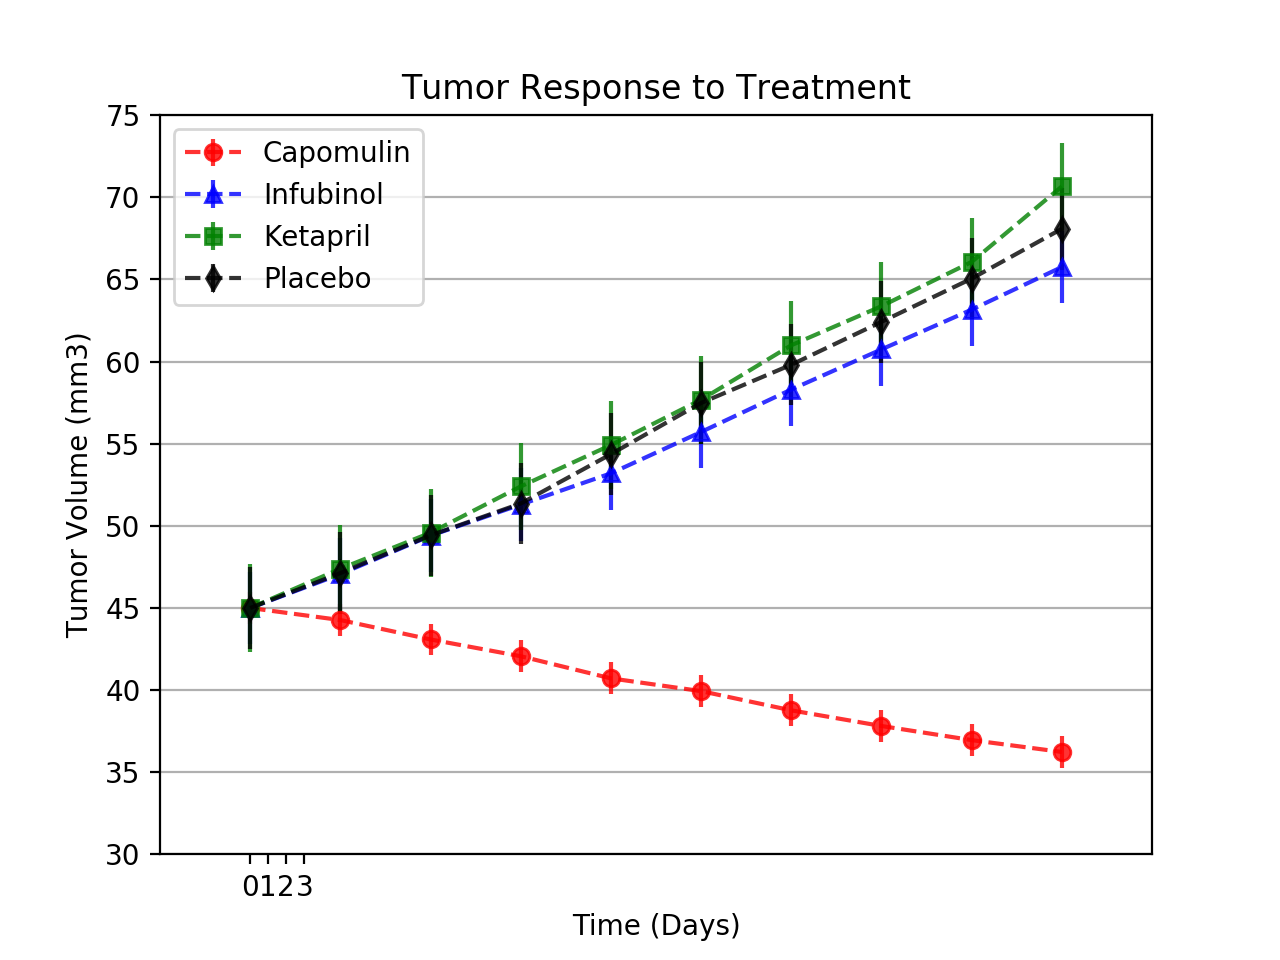

In [77]:
# Timepoint = tumor_reformatted_df.index

# Generate the Plot (with Error Bars) 
fig, ax = plt.subplots()

#tumor_reformatted_df.plot(ax=ax)
#tumor_reformatted_df.plot.scatter(x='Timepoint', y='Tumor Volume (mm3)')
#tumor_reformatted_df.plot.scatter(x="Timepoint", y="Capomulin")

ax.errorbar(tumor_reformatted_df['Timepoint'], tumor_reformatted_df['Capomulin'], yerr=tumor_reformatted_df['Capomulin'].sem(), marker ='o', color="red",
alpha=0.8, linestyle='--', label="Capomulin") 
# ax.errorbar(tumor_reformatted_df['Timepoint'], tumor_reformatted_df['Ceftamin'], yerr=tumor_reformatted_df['Ceftamin'].sem(), marker ='p', color="tan",
# alpha=0.8, linestyle='--', label="Ceftamin") 
ax.errorbar(tumor_reformatted_df['Timepoint'], tumor_reformatted_df['Infubinol'], yerr=tumor_reformatted_df['Infubinol'].sem(), marker ='^', color="blue",
alpha=0.8, linestyle='--', label="Infubinol")
ax.errorbar(tumor_reformatted_df['Timepoint'], tumor_reformatted_df['Ketapril'], yerr=tumor_reformatted_df['Ketapril'].sem(), marker ='s', color="green",
alpha=0.8, linestyle='--', label="Ketapril")
# ax.errorbar(tumor_reformatted_df['Timepoint'], tumor_reformatted_df['Naftisol'], yerr=tumor_reformatted_df['Naftisol'].sem(), marker ='*', color="orange",
# alpha=0.8, linestyle='--', label="Naftisol")
ax.errorbar(tumor_reformatted_df['Timepoint'], tumor_reformatted_df['Placebo'], yerr=tumor_reformatted_df['Placebo'].sem(), marker ='d', color="black",
alpha=0.8, linestyle='--', label="Placebo")
# ax.errorbar(tumor_reformatted_df['Timepoint'], tumor_reformatted_df['Propriva'], yerr=tumor_reformatted_df['Propriva'].sem(), marker ='h', color="sienna",
# alpha=0.8, linestyle='--', label="Propriva")
# ax.errorbar(tumor_reformatted_df['Timepoint'], tumor_reformatted_df['Ramicane'], yerr=tumor_reformatted_df['Ramicane'].sem(), marker ='D', color="teal",
# alpha=0.8, linestyle='--', label="Ramicane")
# ax.errorbar(tumor_reformatted_df['Timepoint'], tumor_reformatted_df['Stelasyn'], yerr=tumor_reformatted_df['Stelasyn'].sem(), marker ='>', color="violet",
# alpha=0.8, linestyle='--', label="Stelasyn")
# ax.errorbar(tumor_reformatted_df['Timepoint'], tumor_reformatted_df['Zoniferol'], yerr=tumor_reformatted_df['Zoniferol'].sem(), marker ='<', color="yellowgreen",
# alpha=0.8, linestyle='--', label="Zoniferol")

ax.yaxis.grid()
ax.set(title='Tumor Response to Treatment',xlabel='Time (Days)',ylabel='Tumor Volume (mm3)', 
       xlim=((tumor_reformatted_df['Timepoint']).min()-5, (tumor_reformatted_df['Timepoint']).max()+5), 
       ylim = (30,75))
plt.legend(loc='upper left')
plt.show()
# Save the Figure
path = os.path.join("Images/treatment.png")
path
fig.savefig(path)

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame
met_mean_df = pd.DataFrame(mean, columns=["Metastatic Sites"])
met_mean_df
# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame
met_se_df = pd.DataFrame(se,columns=["Metastatic Sites"])
# Preview DataFrame
met_se_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [12]:
# Minor Data Munging to Re-Format the Data Frames
met_df = met_mean_df.reset_index()
met_reformatted_df = met_df.pivot(index ='Timepoint', columns ='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
met_reformatted_df 
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [13]:
met_reformatted_df.reset_index(inplace=True)

<IPython.core.display.Javascript object>


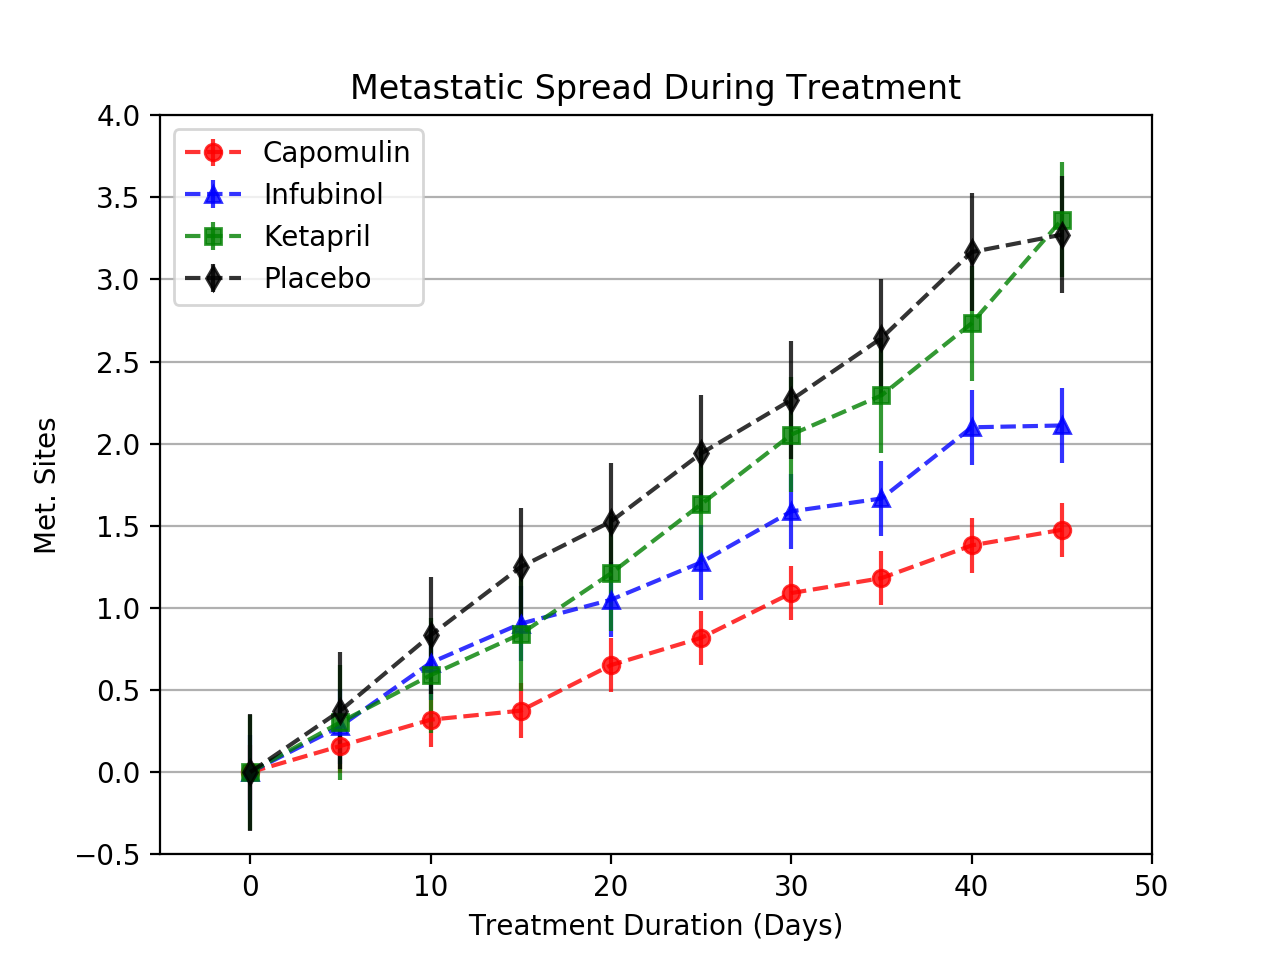

In [78]:
# Generate the Plot (with Error Bars)
fig2, ax2 = plt.subplots()

ax2.errorbar(met_reformatted_df['Timepoint'], met_reformatted_df['Capomulin'], yerr=met_reformatted_df['Capomulin'].sem(), marker ='o', color="red",
alpha=0.8, linestyle='--', label="Capomulin") 
# ax2.errorbar(met_reformatted_df['Timepoint'], met_reformatted_df['Ceftamin'], yerr=met_reformatted_df['Ceftamin'].sem(), marker ='p', color="tan",
# alpha=0.8, linestyle='--', label="Ceftamin") 
ax2.errorbar(met_reformatted_df['Timepoint'], met_reformatted_df['Infubinol'], yerr=met_reformatted_df['Infubinol'].sem(), marker ='^', color="blue",
alpha=0.8, linestyle='--', label="Infubinol")
ax2.errorbar(met_reformatted_df['Timepoint'], met_reformatted_df['Ketapril'], yerr=met_reformatted_df['Ketapril'].sem(), marker ='s', color="green",
alpha=0.8, linestyle='--', label="Ketapril")
# ax2.errorbar(met_reformatted_df['Timepoint'], met_reformatted_df['Naftisol'], yerr=met_reformatted_df['Naftisol'].sem(), marker ='*', color="orange",
# alpha=0.8, linestyle='--', label="Naftisol")
ax2.errorbar(met_reformatted_df['Timepoint'], met_reformatted_df['Placebo'], yerr=met_reformatted_df['Placebo'].sem(), marker ='d', color="black",
alpha=0.8, linestyle='--', label="Placebo")
# ax2.errorbar(met_reformatted_df['Timepoint'], met_reformatted_df['Propriva'], yerr=met_reformatted_df['Propriva'].sem(), marker ='h', color="sienna",
# alpha=0.8, linestyle='--', label="Propriva")
# ax2.errorbar(met_reformatted_df['Timepoint'], met_reformatted_df['Ramicane'], yerr=met_reformatted_df['Ramicane'].sem(), marker ='D', color="teal",
# alpha=0.8, linestyle='--', label="Ramicane")
# ax2.errorbar(met_reformatted_df['Timepoint'], met_reformatted_df['Stelasyn'], yerr=met_reformatted_df['Stelasyn'].sem(), marker ='>', color="violet",
# alpha=0.8, linestyle='--', label="Stelasyn")
# ax2.errorbar(met_reformatted_df['Timepoint'], met_reformatted_df['Zoniferol'], yerr=met_reformatted_df['Zoniferol'].sem(), marker ='<', color="yellowgreen",
# alpha=0.8, linestyle='--', label="Zoniferol")

ax2.yaxis.grid()
ax2.set(title='Metastatic Spread During Treatment',xlabel='Treatment Duration (Days)',ylabel='Met. Sites', 
       xlim=((met_reformatted_df['Timepoint']).min()-5, (met_reformatted_df['Timepoint']).max()+5),
       ylim = (-0.5,4))

plt.legend(loc='upper left')
plt.show()


# Save the Figure
path = os.path.join("Images/spread.png")
path
fig.savefig(path)
# Show the Figure

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped = combined_df.groupby(["Drug","Timepoint"])
mouse_count = grouped.count()
# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count, columns=["Mouse ID"])
# Preview DataFrame

# Convert to DataFrame

# Preview DataFrame
mouse_count_df = mouse_count_df.rename(columns={"Mouse ID": "Mouse Count"})
mouse_count_df

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
...                          ...
Zoniferol 25                  16
          30                  15
          35                  14
          40                  14
          45                  14

[100 rows x 1 columns]

In [16]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_df = mouse_count_df.reset_index()
mouse_count_reformatted_df = mouse_count_df.pivot(index ='Timepoint', columns ='Drug',values='Mouse Count')
# Preview the Data Frame
mouse_count_reformatted_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [17]:
mouse_count_reformatted_df.reset_index(inplace=True)

<IPython.core.display.Javascript object>


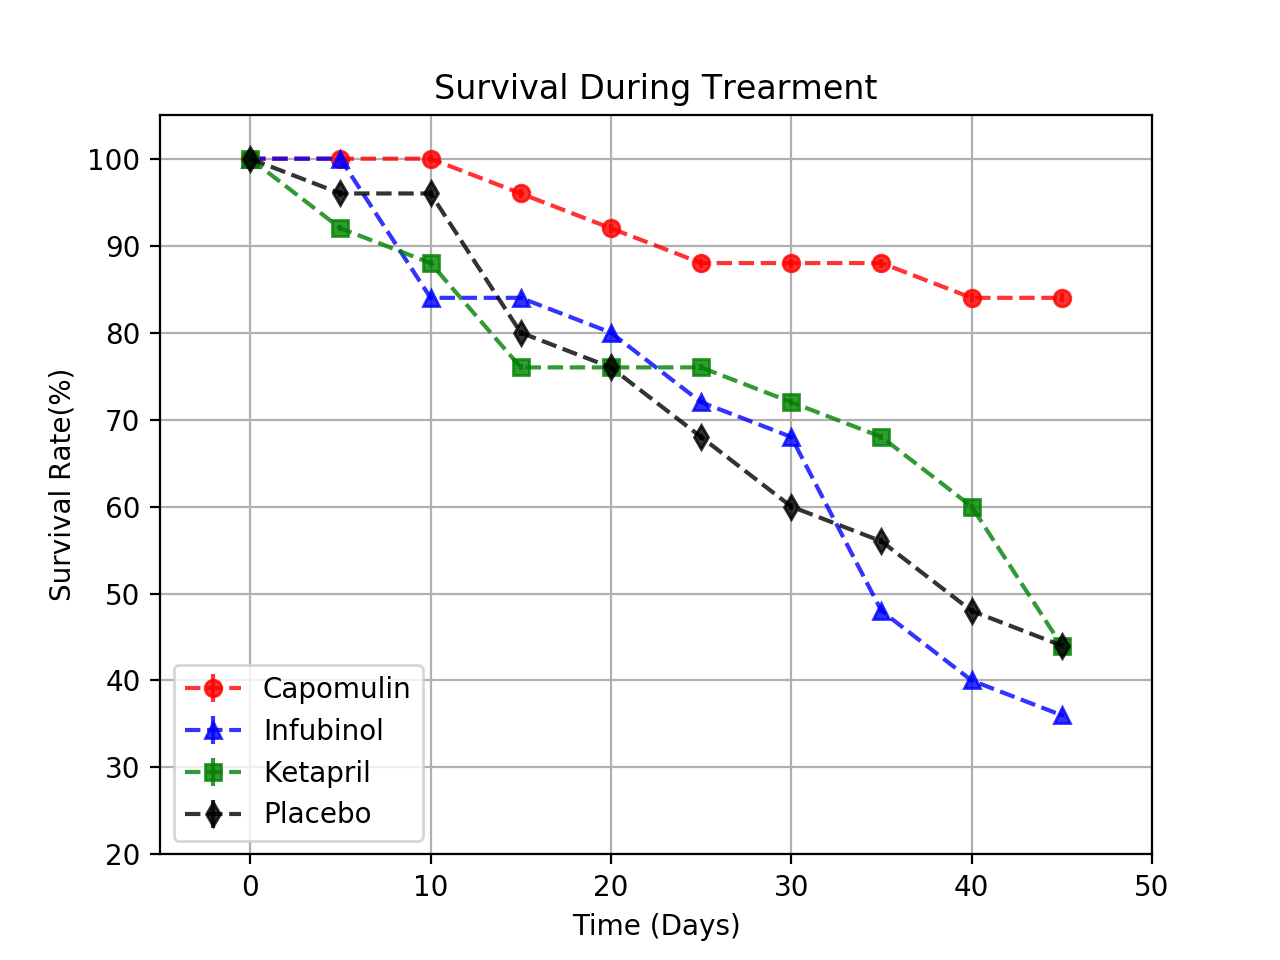

In [79]:
# Generate the Plot (Accounting for percentages)
fig3, ax3 = plt.subplots()

ax3.errorbar(mouse_count_reformatted_df['Timepoint'], (mouse_count_reformatted_df['Capomulin']/mouse_count_reformatted_df['Capomulin'][0]) * 100, yerr=mouse_count_reformatted_df['Capomulin'].sem(), marker ='o', color="red",
alpha=0.8, linestyle='--', label="Capomulin") 
# ax3.errorbar(mouse_count_reformatted_df['Timepoint'], (mouse_count_reformatted_df['Ceftamin']/mouse_count_reformatted_df['Ceftamin'][0]) * 100, yerr=met_reformatted_df['Ceftamin'].sem(), marker ='p', color="tan",
# alpha=0.8, linestyle='--', label="Ceftamin") 
ax3.errorbar(mouse_count_reformatted_df['Timepoint'], (mouse_count_reformatted_df['Infubinol']/mouse_count_reformatted_df['Infubinol'][0]) * 100, yerr=met_reformatted_df['Infubinol'].sem(), marker ='^', color="blue",
alpha=0.8, linestyle='--', label="Infubinol")
ax3.errorbar(mouse_count_reformatted_df['Timepoint'], (mouse_count_reformatted_df['Ketapril']/mouse_count_reformatted_df['Ketapril'][0]) * 100, yerr=met_reformatted_df['Ketapril'].sem(), marker ='s', color="green",
alpha=0.8, linestyle='--', label="Ketapril")
# ax3.errorbar(mouse_count_reformatted_df['Timepoint'], (mouse_count_reformatted_df['Naftisol']/mouse_count_reformatted_df['Naftisol'][0]) * 100, yerr=met_reformatted_df['Naftisol'].sem(), marker ='*', color="orange",
# alpha=0.8, linestyle='--', label="Naftisol")
ax3.errorbar(mouse_count_reformatted_df['Timepoint'], (mouse_count_reformatted_df['Placebo']/mouse_count_reformatted_df['Placebo'][0]) * 100, yerr=met_reformatted_df['Placebo'].sem(), marker ='d', color="black",
alpha=0.8, linestyle='--', label="Placebo")
# ax3.errorbar(mouse_count_reformatted_df['Timepoint'], (mouse_count_reformatted_df['Propriva']/mouse_count_reformatted_df['Propriva'][0]) * 100, yerr=met_reformatted_df['Propriva'].sem(), marker ='h', color="sienna",
# alpha=0.8, linestyle='--', label="Propriva")
# ax3.errorbar(mouse_count_reformatted_df['Timepoint'], (mouse_count_reformatted_df['Ramicane']/mouse_count_reformatted_df['Ramicane'][0]) * 100, yerr=met_reformatted_df['Ramicane'].sem(), marker ='D', color="teal",
# alpha=0.8, linestyle='--', label="Ramicane")
# ax3.errorbar(mouse_count_reformatted_df['Timepoint'], (mouse_count_reformatted_df['Stelasyn']/mouse_count_reformatted_df['Stelasyn'][0]) * 100, yerr=met_reformatted_df['Stelasyn'].sem(), marker ='>', color="violet",
# alpha=0.8, linestyle='--', label="Stelasyn")
# ax3.errorbar(mouse_count_reformatted_df['Timepoint'], (mouse_count_reformatted_df['Zoniferol']/mouse_count_reformatted_df['Zoniferol'][0]) * 100, yerr=met_reformatted_df['Zoniferol'].sem(), marker ='<', color="yellowgreen",
# alpha=0.8, linestyle='--', label="Zoniferol")

ax3.grid()
ax3.set(title='Survival During Trearment',xlabel='Time (Days)',ylabel='Survival Rate(%)',
       xlim=((met_reformatted_df['Timepoint']).min()-5, (met_reformatted_df['Timepoint']).max()+5),
       ylim = (20,105))

plt.legend(loc='lower left')

#Save the Figure
path = os.path.join("Images/survival.png")
path
fig.savefig(path)
#Show the Figure
plt.show()

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
tumor_percent_change = (tumor_reformatted_df.iloc[9,:]-tumor_reformatted_df.iloc[0,:])/tumor_reformatted_df.iloc[0,:] * 100
tumor_percent_change
# Display the data to confirm


Drug
Timepoint          inf
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [20]:
tumor_percent_change_df = pd.DataFrame(tumor_percent_change)
tumor_percent_change_df.index

Index(['Timepoint', 'Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril',
       'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [21]:
tumor_per_change =tumor_percent_change_df.drop(tumor_percent_change_df.index[0])
tumor_per_change =tumor_per_change.drop(["Ceftamin","Naftisol","Propriva","Ramicane","Stelasyn","Zoniferol"])
tumor_per_change

,0
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


In [24]:
tumor_per_change.reset_index(inplace=True)

In [25]:
tumor_per_change.columns
# df_tumor_per_change = tumor_per_change.rename(columns = {'[0]': 'percentchange'}, inplace=True)
# df_tumor_per_change.columns

Index(['Drug', 0], dtype='object')

<IPython.core.display.Javascript object>


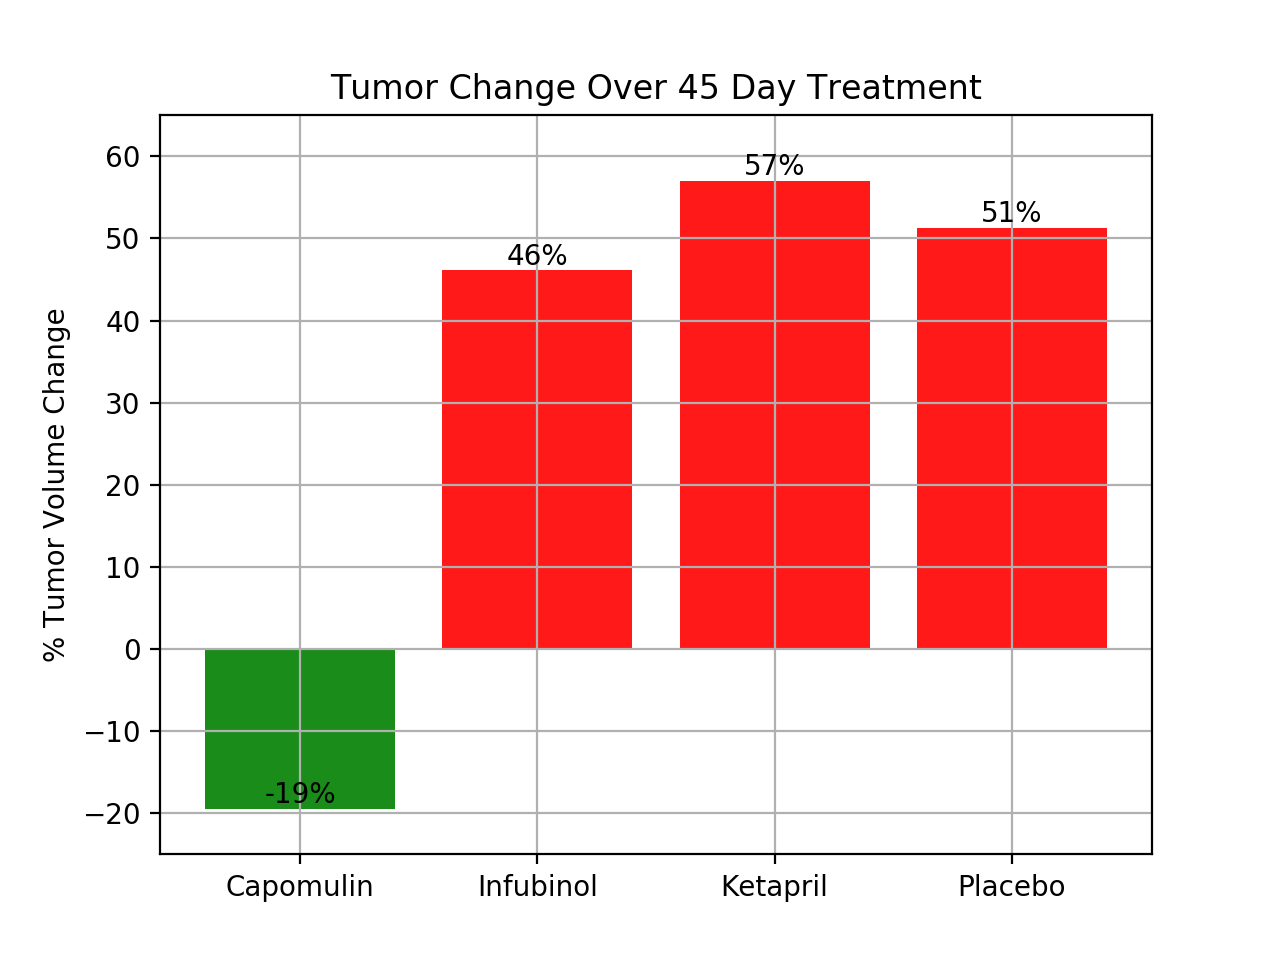

In [85]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes
x_axis = np.arange(len(tumor_per_change["Drug"]))
y_axis = np.arange(-25,65,20)
fig4, ax4 = plt.subplots()
color = tuple(np.where(tumor_per_change[0]>0, 'r', 'g'))
ax4.bar(tumor_per_change["Drug"], tumor_per_change[0], color=color, alpha=0.9, align="center")
#ax4.set_xticks(gyms);
ax4.set(title="Tumor Change Over 45 Day Treatment", ylabel="% Tumor Volume Change",ylim=(-25,65));
ax4.grid()
ax4.set_xticks(x_axis)

# plt.show()
# Call functions to implement the function calls

def plot_labels(axis):
    rects = axis.patches 
    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = '{:.0f}%'.format(y_value)

        # Vertical alignment for positive values
        va = 'top'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            va = 'top'

        # Create annotation
        axis.annotate(label, (x_value, y_value), 
                      xytext=(0, 2), 
                      textcoords="offset points", 
                      ha='center')    


# call the function we defined
plot_labels(plt.gca())


# Call the function above. All the magic happens there.



# Save the Figure
path = os.path.join("Images/change.png")
path
fig.savefig(path)

# Show the Figure
plt.show()

Written description of three observable trends based on the data.
1. Capomulin is the most effective drug. It is the only drug that has a negative percentage change of 19% in the tumor volume change, and it has highest survival rate in the experiment, which is above 80%.
2. In general, Ketapril is the lowest performing drug. We observed 57% increase in tumor volume change.
3. While placebo drug has the highest metastatic spread during the treatment, Capomulin is the most effective in contorling the spread under 1.5 sites over 45 days. 
